Viz Gandhi et al motifs

In [47]:
#get Gandhi et al motifs
!wget http://www.beerlab.org/gkmsvm/downloads/gkmsvm-2.0.tar.gz -O gkmsvm-2.0.tar.gz
!tar -xzf gkmsvm-2.0.tar.gz

--2019-02-10 00:08:11--  http://www.beerlab.org/gkmsvm/downloads/gkmsvm-2.0.tar.gz
Resolving www.beerlab.org... 23.229.186.73
Connecting to www.beerlab.org|23.229.186.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2936492 (2.8M) [application/x-gzip]
Saving to: 'gkmsvm-2.0.tar.gz'

100%[======================================>] 2,936,492   3.15MB/s   in 0.9s   

2019-02-10 00:08:12 (3.15 MB/s) - 'gkmsvm-2.0.tar.gz' saved [2936492/2936492]



In [48]:
!python gkmsvm/scripts/nrkmers.py 11 nrkmers.fa

In [58]:
!~/lsgkm/src/gkmpredict -v 1 nrkmers.fa lsgkm_defaultsettings_t2.model.txt nrkmers_scores.txt

In [59]:
!python gkmsvm/scripts/svmw_emalign.py nrkmers_scores.txt 21 gandhietalpwms

INFO  @ Sun, 10 Feb 2019 00:32:32: seed kmer: CTCCTGCTGTG 
INFO  @ Sun, 10 Feb 2019 00:32:33: round - 0/100 
INFO  @ Sun, 10 Feb 2019 00:32:39: obj: 16083.268696 
INFO  @ Sun, 10 Feb 2019 00:32:39: round - 1/100 
INFO  @ Sun, 10 Feb 2019 00:32:45: obj: 92992.125311 
INFO  @ Sun, 10 Feb 2019 00:32:45: round - 2/100 
INFO  @ Sun, 10 Feb 2019 00:32:51: obj: 56761.468484 
INFO  @ Sun, 10 Feb 2019 00:32:51: round - 3/100 
INFO  @ Sun, 10 Feb 2019 00:32:57: obj: 64843.338187 
INFO  @ Sun, 10 Feb 2019 00:32:57: round - 4/100 
INFO  @ Sun, 10 Feb 2019 00:33:03: obj: 62562.715117 
INFO  @ Sun, 10 Feb 2019 00:33:03: round - 5/100 
INFO  @ Sun, 10 Feb 2019 00:33:10: obj: 63198.430302 
INFO  @ Sun, 10 Feb 2019 00:33:10: round - 6/100 
INFO  @ Sun, 10 Feb 2019 00:33:16: obj: 63012.323616 
INFO  @ Sun, 10 Feb 2019 00:33:16: round - 7/100 
INFO  @ Sun, 10 Feb 2019 00:33:22: obj: 63042.489454 
INFO  @ Sun, 10 Feb 2019 00:33:22: round - 8/100 
INFO  @ Sun, 10 Feb 2019 00:33:28: obj: 63042.489454 
INFO 

In [60]:
!cat gandhietalpwms_models.meme

MEME version 4

ALPHABET= ACGT

strands: + -

Background letter frequencies (from entire human genome)
A 0.29 C 0.21 G 0.21 T 0.29

MOTIF GKM.1
letter-probability matrix: alength= 4 w= 21 nsites= 9210 E= 0
0.251 0.250 0.250 0.250
0.251 0.249 0.249 0.251
0.248 0.247 0.257 0.247
0.254 0.245 0.263 0.239
0.248 0.263 0.240 0.249
0.219 0.315 0.220 0.246
0.202 0.262 0.216 0.319
0.160 0.519 0.162 0.159
0.193 0.487 0.158 0.162
0.197 0.222 0.162 0.420
0.164 0.163 0.519 0.153
0.162 0.501 0.171 0.166
0.167 0.162 0.184 0.487
0.155 0.155 0.534 0.155
0.246 0.179 0.249 0.327
0.162 0.168 0.500 0.170
0.309 0.253 0.206 0.233
0.237 0.241 0.274 0.247
0.240 0.256 0.260 0.244
0.247 0.257 0.246 0.250
0.249 0.251 0.249 0.251

MOTIF GKM.19
letter-probability matrix: alength= 4 w= 21 nsites= 5563 E= 0
0.250 0.250 0.255 0.245
0.246 0.239 0.260 0.255
0.227 0.266 0.261 0.246
0.201 0.350 0.224 0.226
0.191 0.403 0.186 0.220
0.307 0.176 0.173 0.343
0.161 0.163 0.161 0.515
0.159 0.157 0.157 0.527
0.160 0.181 0.501 0.15

You are using pip version 18.0, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Number of motifs: 3


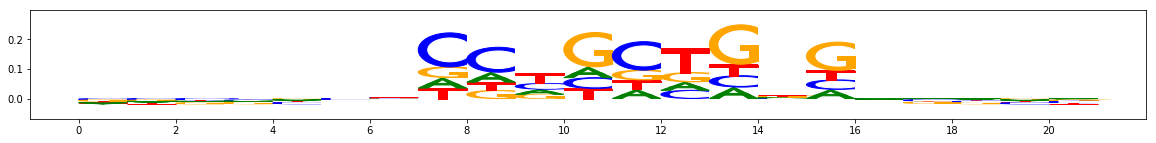

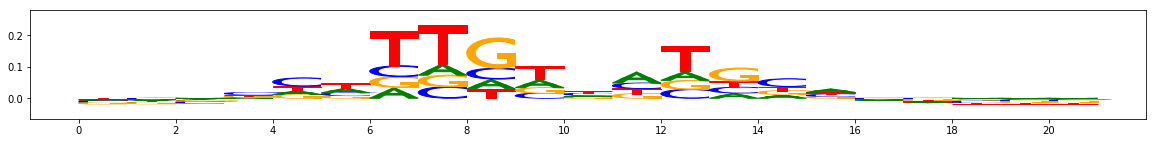

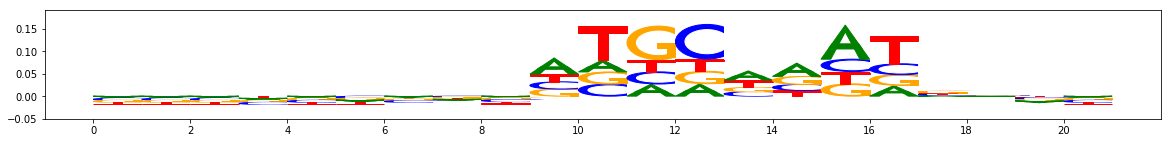

In [61]:
import numpy as np
from __future__ import division, print_function
!pip install vizsequence
!pip install biopython
from vizsequence import viz_sequence
from Bio import motifs
records = motifs.parse(open('gandhietalpwms_models.meme'), 'minimal')
print("Number of motifs:",len(records))

def get_freqs_mat(meme_record):
    counts_mat = np.array([meme_record.counts[x]
                        for x in ['A', 'C', 'G', 'T']])
    normalization = np.sum(counts_mat, axis=0)
    freqs_mat = counts_mat/normalization[None,:]
    return freqs_mat.T

for meme_record in records:
    freqs_mat = get_freqs_mat(meme_record)
    viz_sequence.plot_weights(viz_sequence.ic_scale(
      pwm=freqs_mat,
      background=np.array([
          meme_record.background[x] for x in ['A', 'C', 'G', 'T']])),
          subticks_frequency=2)

Viz HOMER motifs

motif 1


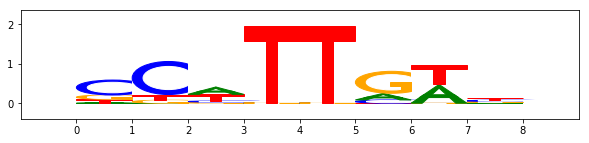

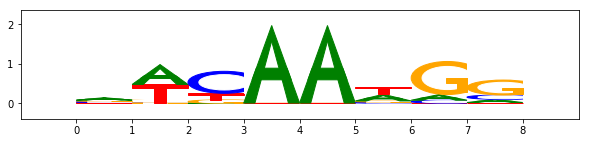

motif 2


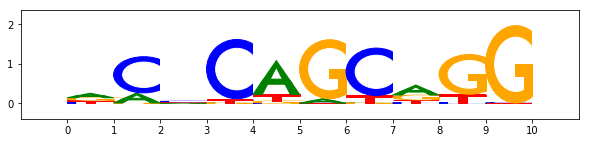

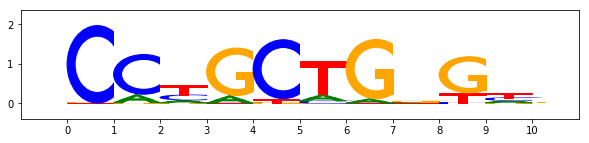

motif 3


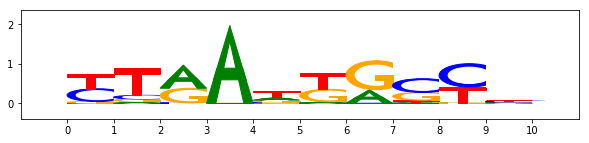

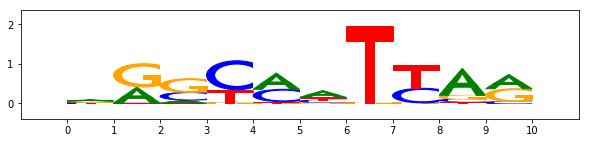

motif 4


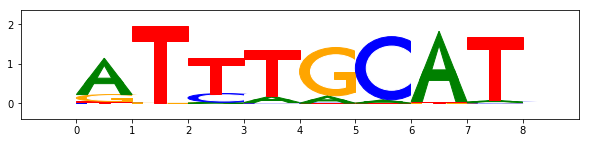

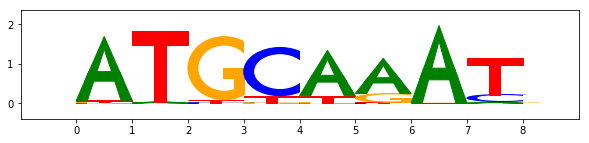

motif 5


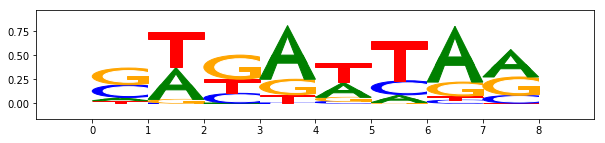

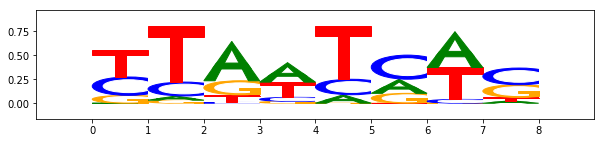

motif 6


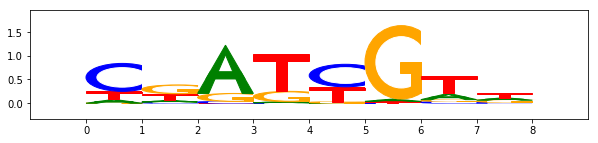

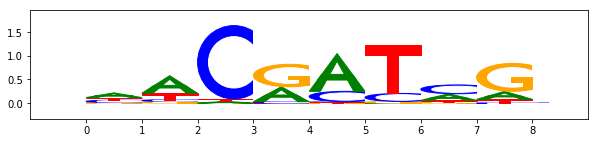

motif 7


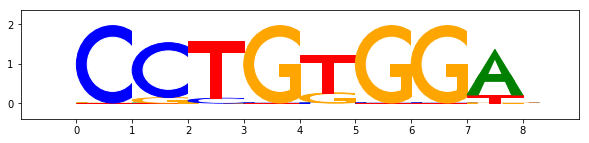

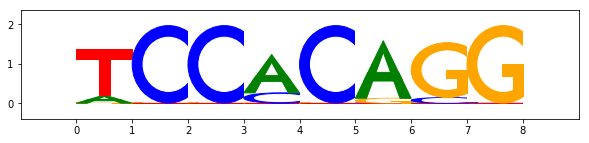

motif 8


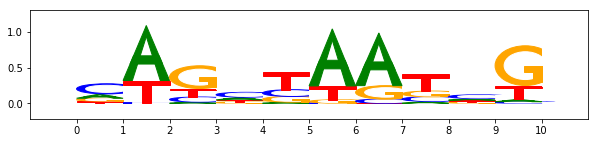

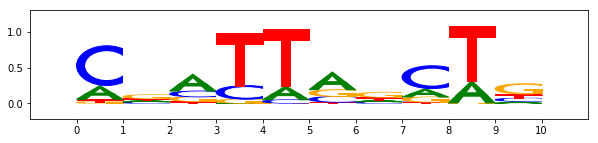

motif 9


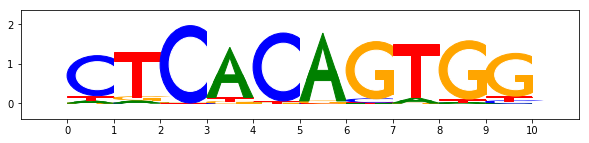

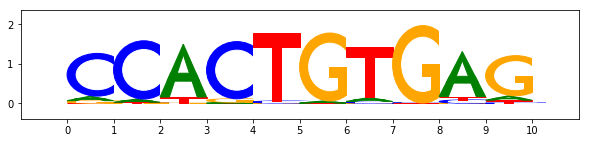

motif 10


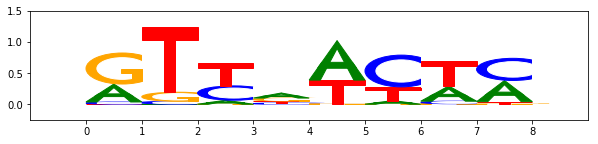

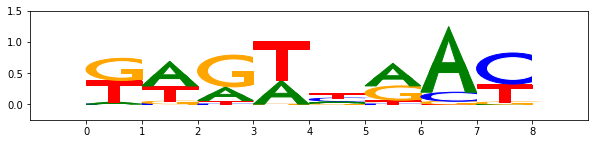

In [16]:
import glob

#HOMER motifs
num_homer_motifs = 10 #these are the number that were denoted as significant
homer_path = "homer_motifResults"

for i in range(num_homer_motifs):
    print("motif",i+1)
    motif_file = homer_path+"/homerResults/motif"+str(i+1)+".motif"
    pwm_rows = []
    for i,line in enumerate(open(motif_file)):
        if (i > 0):
            pwm_rows.append([float(x) for x in line.rstrip().split("\t")])
    pwm_rows = np.array(pwm_rows)
    viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pwm_rows),
                                                    background=np.array([0.25, 0.25, 0.25, 0.25])),
                              figsize=(10,2))
    viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pwm_rows[::-1,::-1]),
                                                    background=np.array([0.25, 0.25, 0.25, 0.25])),
                              figsize=(10,2))